In [1]:
import json
import pandas as pd
from utils import preprocessing, set_index
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras import models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
from dc_vae import DCVAE
from utils import samples_conditions_embedd

2023-05-09 16:06:15.321975: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [23]:
settings_path = 'settings/model_settings.txt'
settings = json.load(open(settings_path, 'r'))
#path = '../../Datasets/TELCO/'
path = "/home/gastong/Documentos/TELCO/v0/" #Rosaluna

filenames = ["TELCO_data_2022_04.zip"]

print(settings)

{'dataset_name': 'TELCO', 'model_name': 'dc-vae', 'scale': False, 'wo_outliers': True, 'max_std': 7, 'T': 128, 'M': 12, 'cnn_units': [64, 64, 64, 64, 64, 64, 64], 'dil_rate': [1, 2, 4, 8, 16, 32, 64], 'kernel': 2, 'strs': 1, 'activation': 'tanh', 'alpha_reg': 0.0001, 'batch_size': 32, 'J': 4, 'epochs': 100, 'lr': 0.0001, 'lr_decay': False, 'decay_rate': 0.96, 'decay_step': 7000, 'val_percent': 0.2, 'seed': 123, 'summary': True, 'custom_metrics': True}


In [24]:
# Load data and predictions
data = pd.read_csv(path+filenames[0])
data = set_index(data)
data = preprocessing(data, flag_scaler=False)
data

,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10,TS11,TS12
time,,,,,,,,,,,,
2022-04-01 00:00:00,0.308390,0.064512,0.850802,1.694093,0.367580,0.283457,0.522742,0.408214,0.533738,0.810097,-0.432718,-0.584539
2022-04-01 00:05:00,0.447559,-0.006948,0.850802,1.673708,0.102838,0.180697,0.171266,0.037537,0.533738,0.810097,-0.432718,-0.584539
2022-04-01 00:10:00,0.332677,-0.059268,-0.137536,1.315068,0.275254,0.250938,0.056596,-0.073666,0.533738,0.810097,-0.432718,-0.584539
2022-04-01 00:15:00,0.296196,-0.065329,-0.137536,1.141090,0.000007,0.094847,-0.055086,-0.157069,6.435752,1.250766,-0.568038,-0.603983
2022-04-01 00:20:00,0.439509,-0.082557,1.983093,1.053001,-0.136669,0.024606,-0.143928,-0.175603,6.435752,1.250766,-0.568038,-0.603983
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30 23:35:00,0.352983,-0.074581,0.506275,1.533222,0.487076,0.141674,0.561459,0.334079,1.553126,2.308372,-0.468192,-0.497042
2022-04-30 23:40:00,0.180603,-0.022261,1.169986,2.465266,0.307368,-0.041733,0.320081,0.185808,1.553126,2.308372,-0.468192,-0.497042
2022-04-30 23:45:00,0.117753,-0.161036,1.169986,2.027793,-0.209240,-0.092462,0.525684,0.287744,-0.049580,1.074498,-0.388861,-0.428989


## Predicciones

In [25]:
    # Model initialization
model = DCVAE(
    settings['T'],
    settings['M'],
    settings['cnn_units'],
    settings['dil_rate'],
    settings['kernel'],
    settings['strs'],
    settings['batch_size'],
    settings['J'],
    settings['epochs'],
    settings['lr'],
    settings['lr_decay'],
    settings['decay_rate'],
    settings['decay_step'],
    settings['model_name'],
    settings['summary']
    ) 

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 128, 12)]    0                                            
__________________________________________________________________________________________________
dcnn_enc_0 (Conv1D)             (None, 128, 64)      1536        input[0][0]                      
__________________________________________________________________________________________________
dcnn_enc_1 (Conv1D)             (None, 128, 64)      8192        dcnn_enc_0[0][0]                 
__________________________________________________________________________________________________
dcnn_enc_2 (Conv1D)             (None, 128, 64)      8192        dcnn_enc_1[0][0]                 
____________________________________________________________________________________________

In [26]:
with tf.device('/gpu:0'):
    anom, error, reconst, sig, latent_space = model.predict(data,
                                            True,
                                            large_result=True,
                                            load_alpha=False,
                                            alpha_set_up = list(np.ones(12)),
                                            alpha_set_down = list(np.ones(12))
                                                        )

In [27]:
th_up = reconst + np.ones(12)*sig
th_down = reconst - np.ones(12)*sig

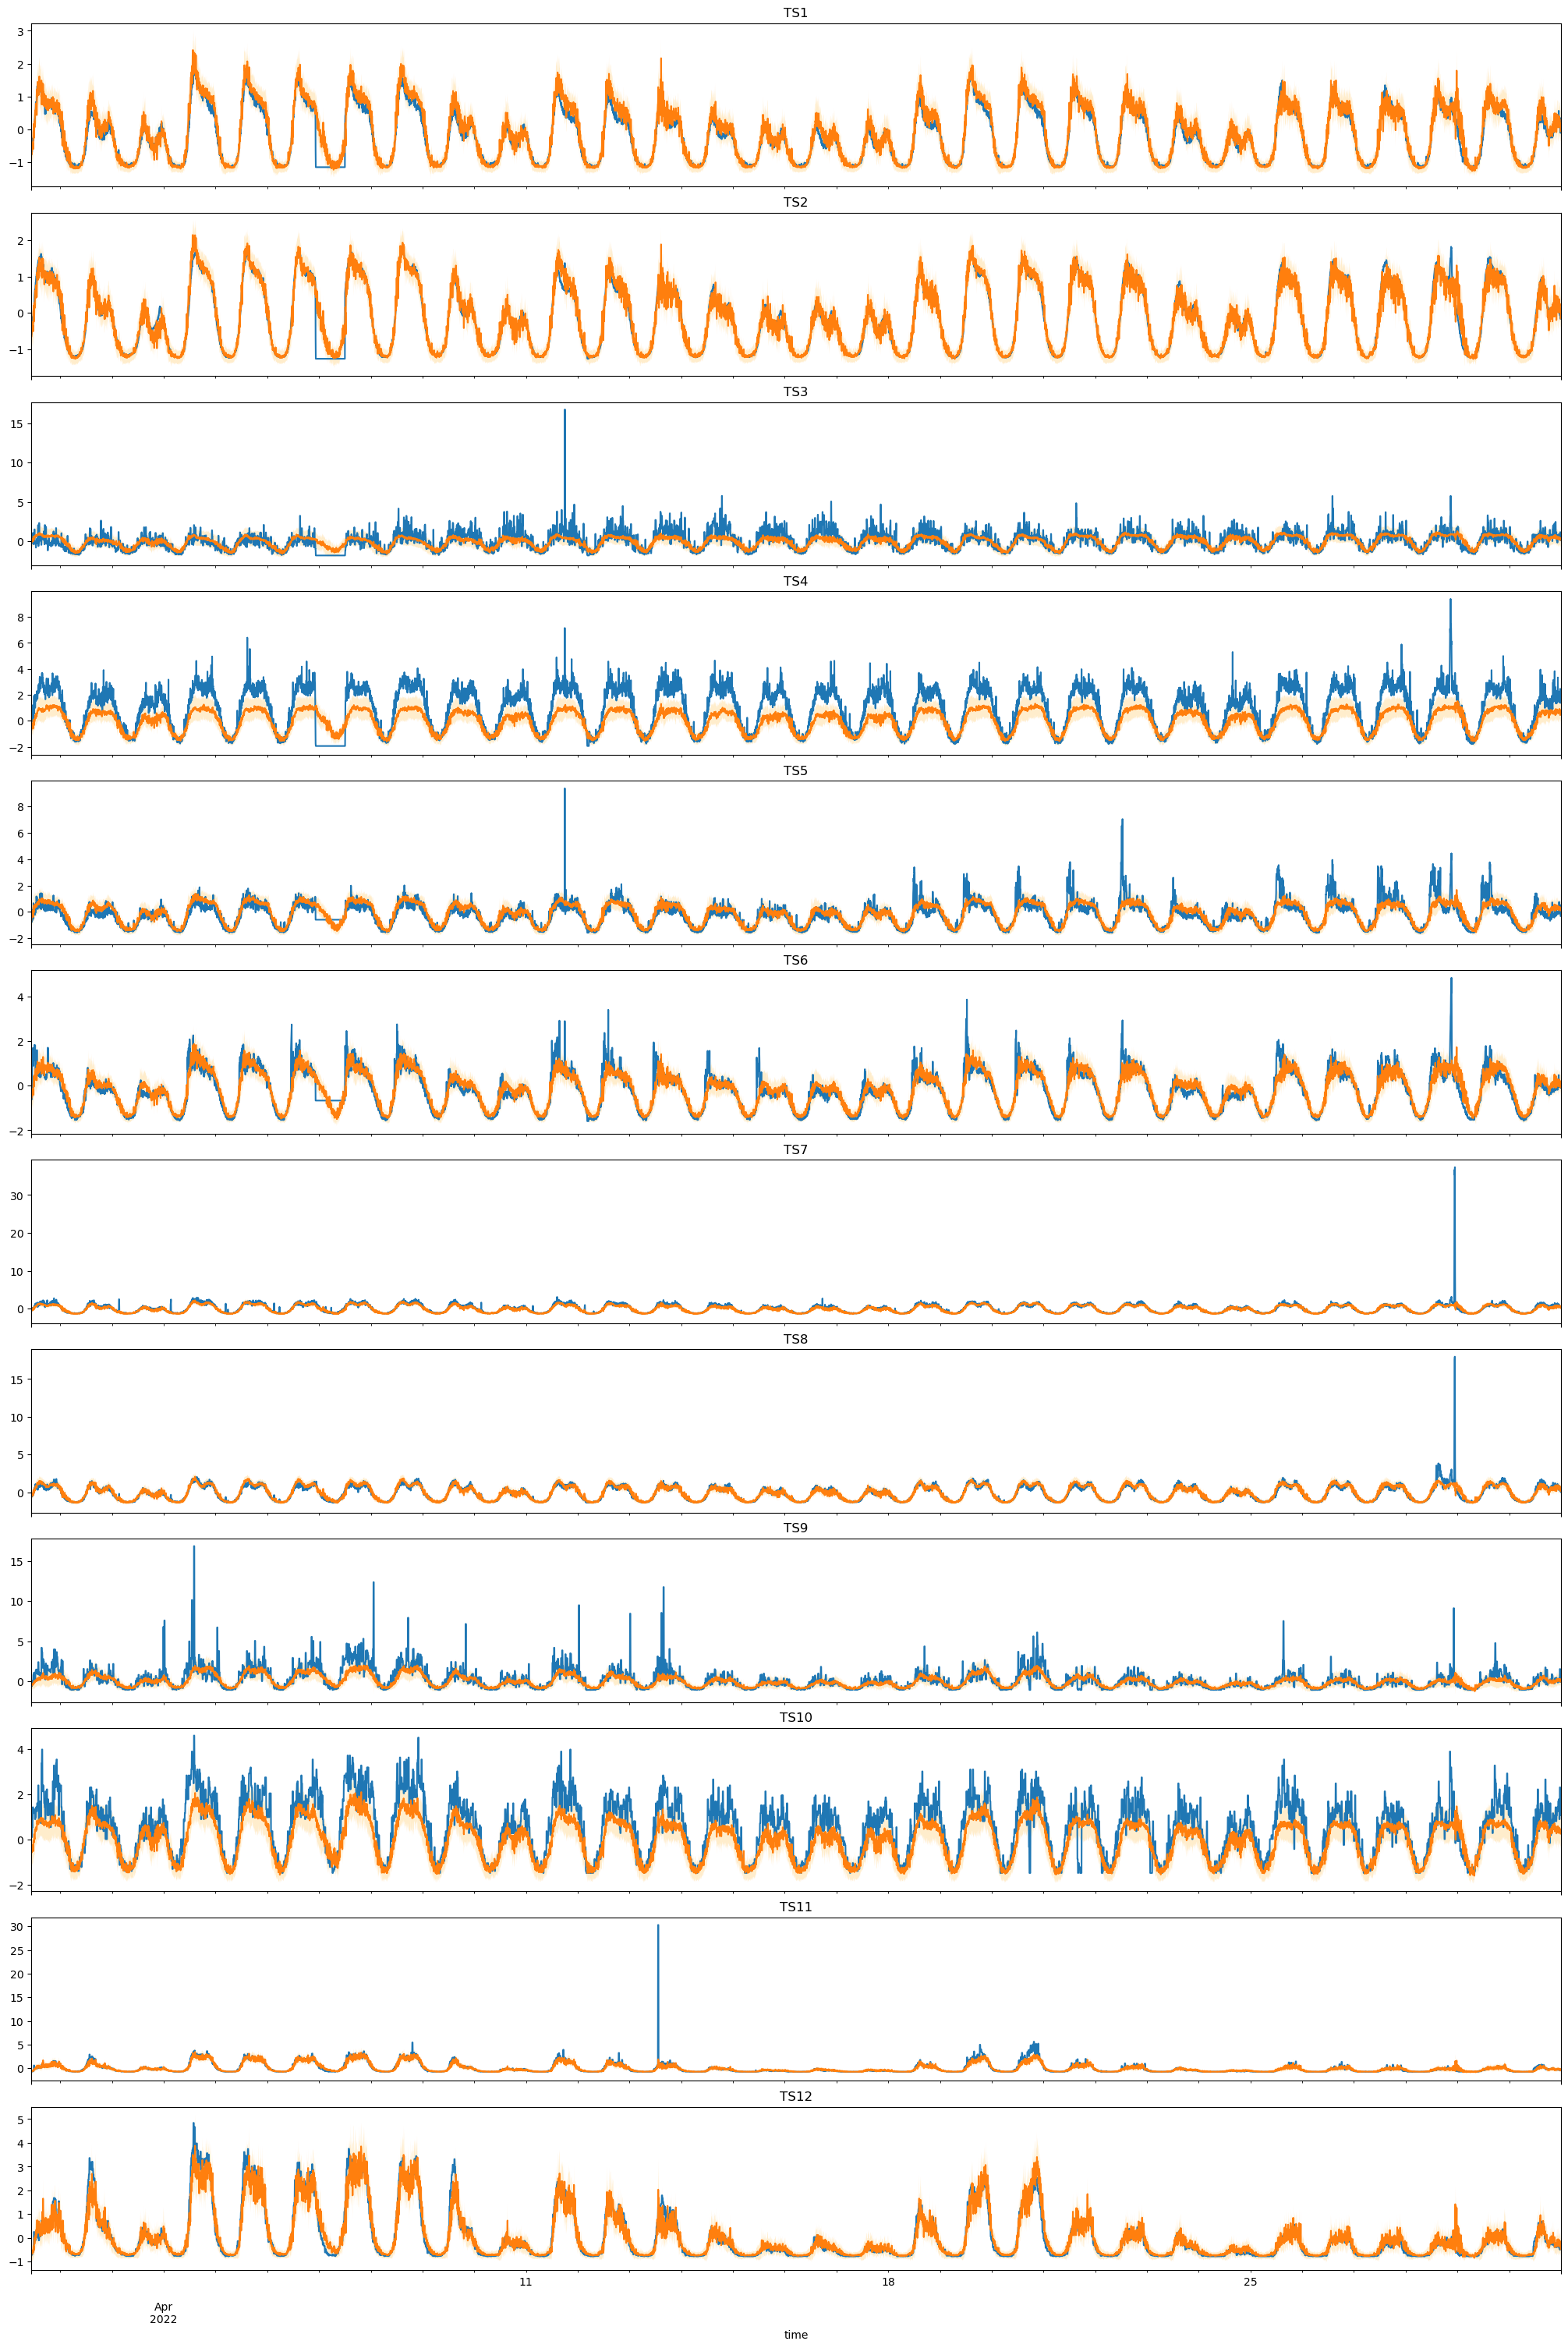

In [28]:
#define number of rows and columns for subplots
nrow=12
ncol=1
data_aux = data[reconst.index[0]:].copy()

columns_list = data_aux.columns

time_start = '2022-04-01'
time_end = '2022-04-30'
fig, axes = plt.subplots(nrow, ncol, figsize=(20,30), constrained_layout=True, sharex=True)

# plot counter
count=0

for r in range(nrow):
    for c in range(ncol):
        data_aux[columns_list[count]][time_start:time_end].plot(ax=axes[r])
        reconst[columns_list[count]][time_start:time_end].plot(ax=axes[r])
        axes[r].fill_between(data_aux[columns_list[count]][time_start:time_end].index,
                         th_up[columns_list[count]][time_start:time_end],
                         th_down[columns_list[count]][time_start:time_end],
                         facecolor='orange', alpha=0.2, interpolate=True)
        axes[r].set_title(columns_list[count])
        count+=1

## Generación de datos

In [29]:
X = data.values
X = np.array([X[i: i + settings['T']] for i in range(0, X.shape[0] - settings['T']+1)])
z_mu, z_log_var, z = model.encoder.predict(X)

In [30]:
z_t = z[:,-1,:]

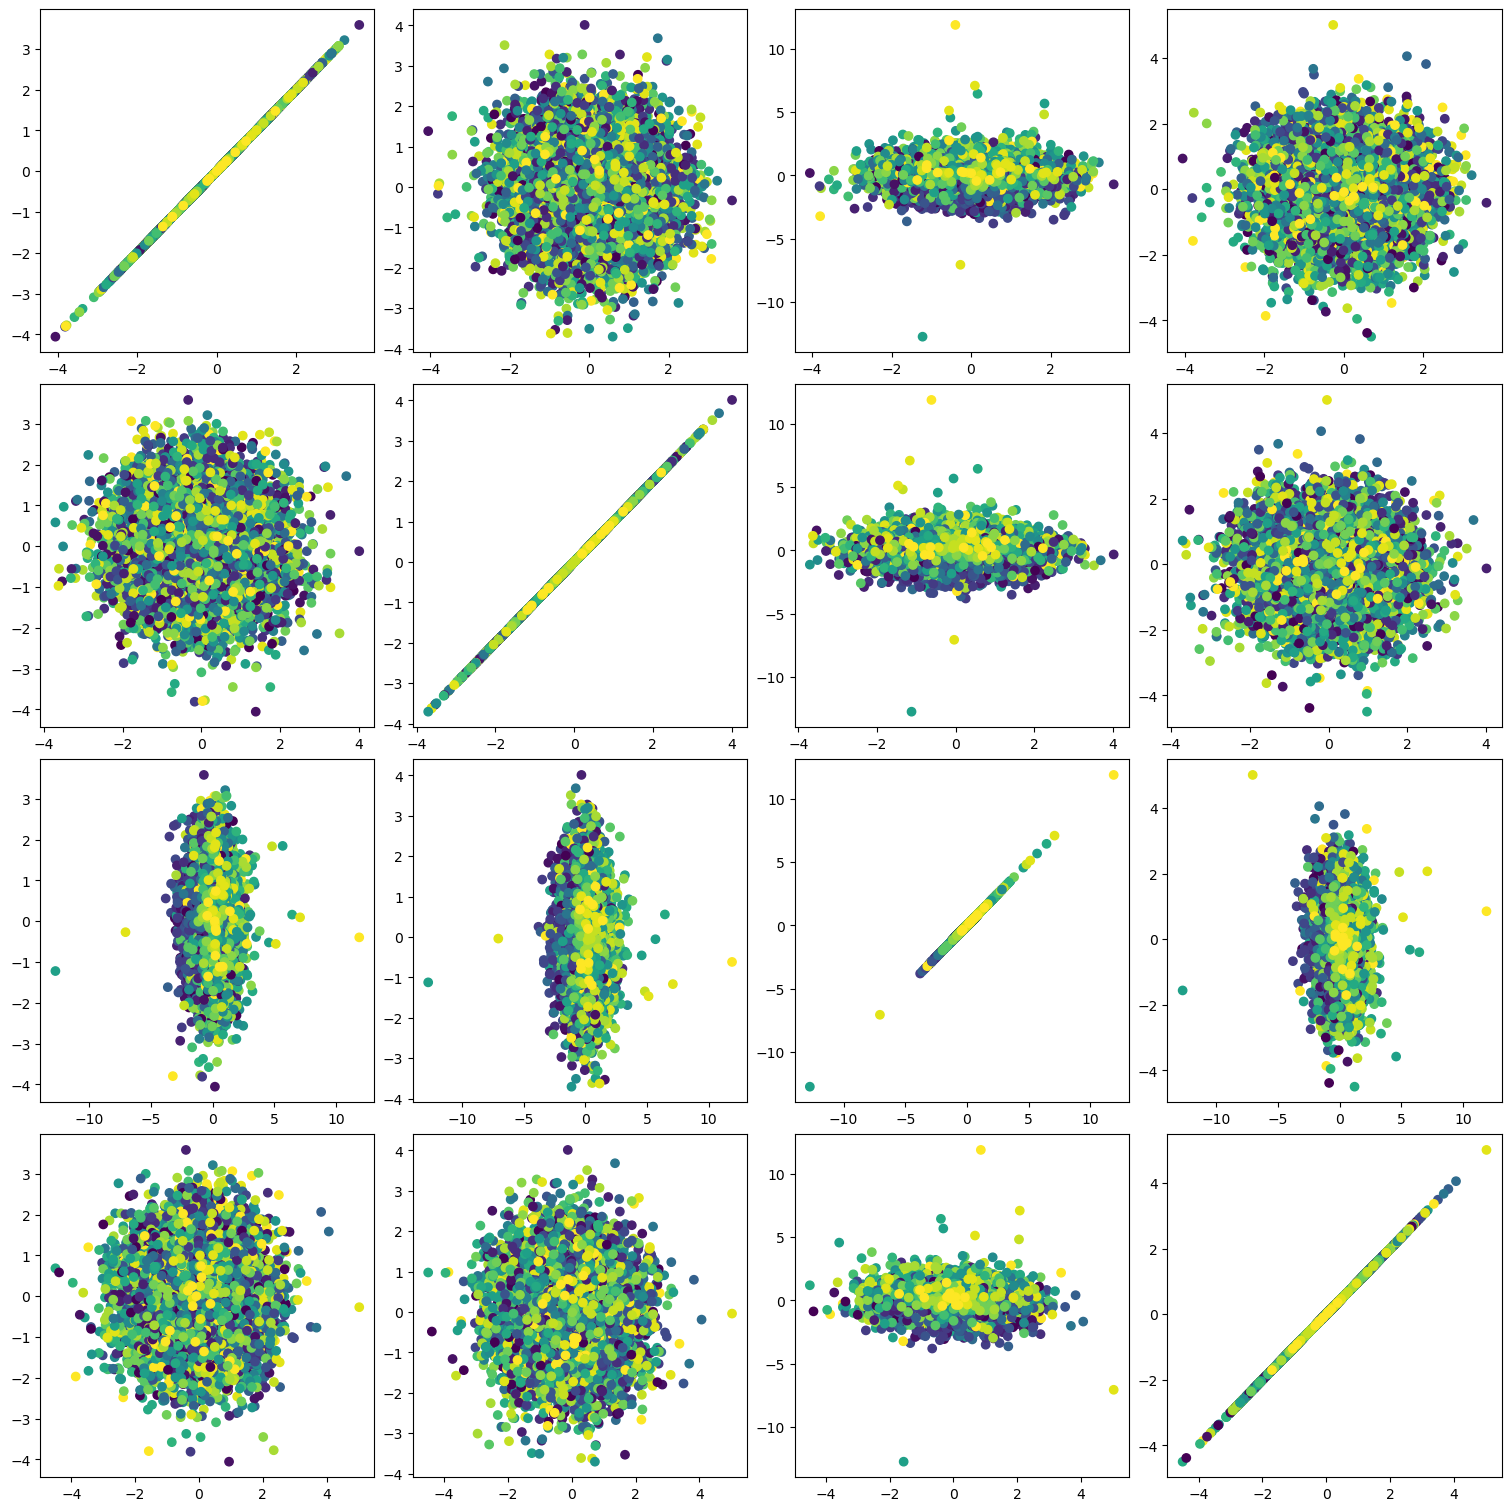

In [31]:
fig, axes = plt.subplots(settings['J'], settings['J'], figsize=(15,15), constrained_layout=True)

for i in range(settings['J']):
    for j in range(settings['J']):
        axes[i,j].scatter(z_t[:, i], z_t[:, j], c=data.index.hour[model.T-1:])

In [ ]:
X_cd, time_info_cd = samples_conditions_embedd(data_cd, settings['T'])

X_cd = np.array(X_cd)
time_info_cd = np.array(time_info_cd)

In [ ]:
noise = np.random.normal(0, 1, (X.shape[0], 1, settings['J']))

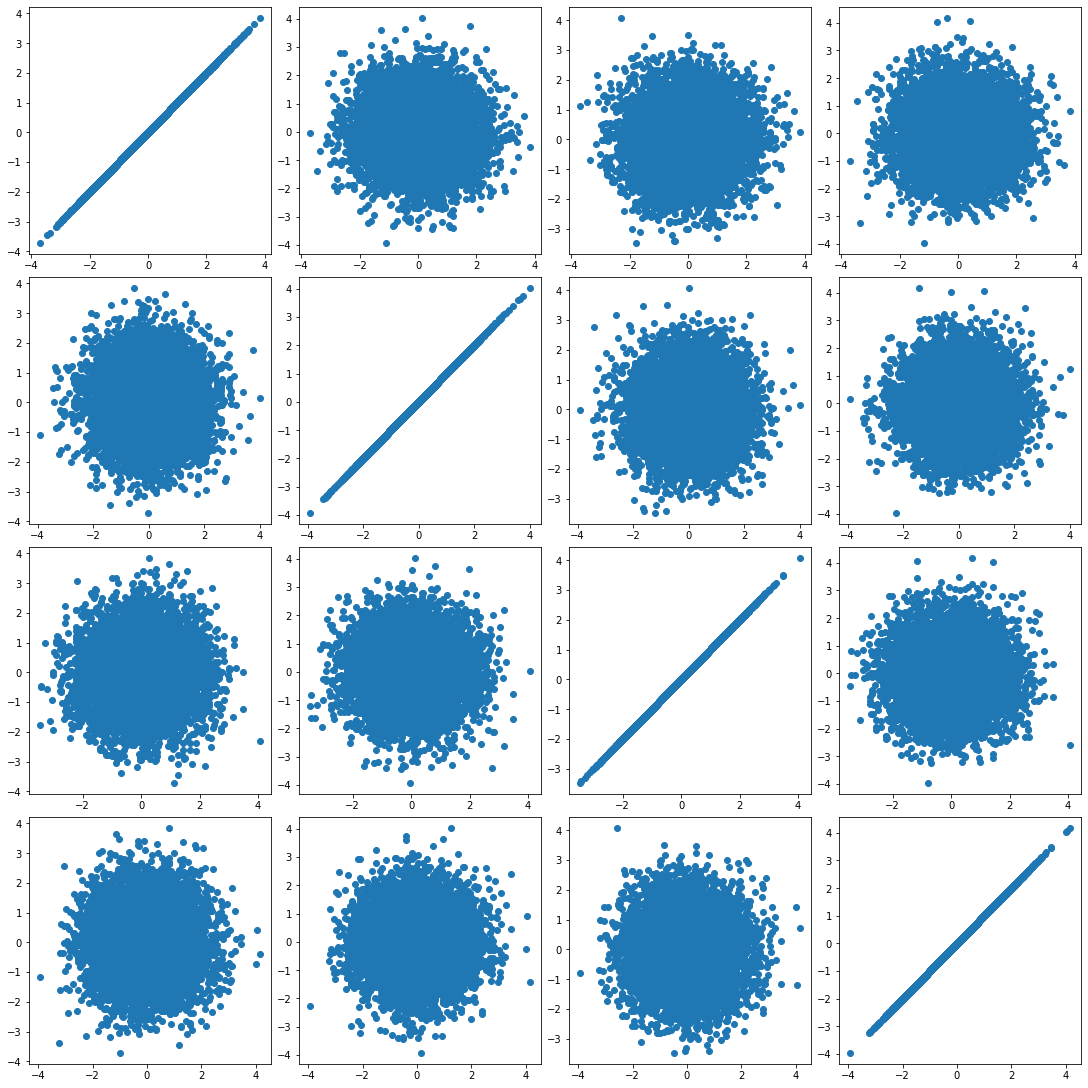

In [ ]:
fig, axes = plt.subplots(settings['J'], settings['J'], figsize=(15,15), constrained_layout=True)

for i in range(settings['J']):
    for j in range(settings['J']):
        axes[i,j].scatter(noise[:, :, i], noise[:, :, j])

In [ ]:
mu_gen, log_var_gen = model.decoder.predict((noise, time_info_cd))

In [ ]:
sig_gen = np.sqrt(np.exp(log_var_gen))

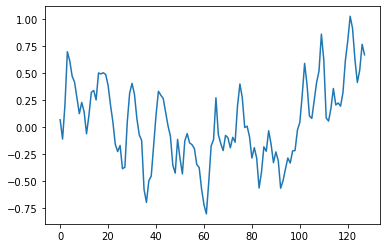

In [ ]:
plt.plot(mu_gen[3,:,5])

In [ ]:
df_mu_gen = pd.DataFrame(mu_gen[:, -1, :], index=reconst_cd.index, columns=reconst_cd.columns)
df_sig_gen = pd.DataFrame(sig_gen[:, -1, :], index=reconst_cd.index, columns=reconst_cd.columns)

In [ ]:
th_up_gen = df_mu_gen + np.ones(12)*df_sig_gen
th_down_gen = df_mu_gen - np.ones(12)*df_sig_gen

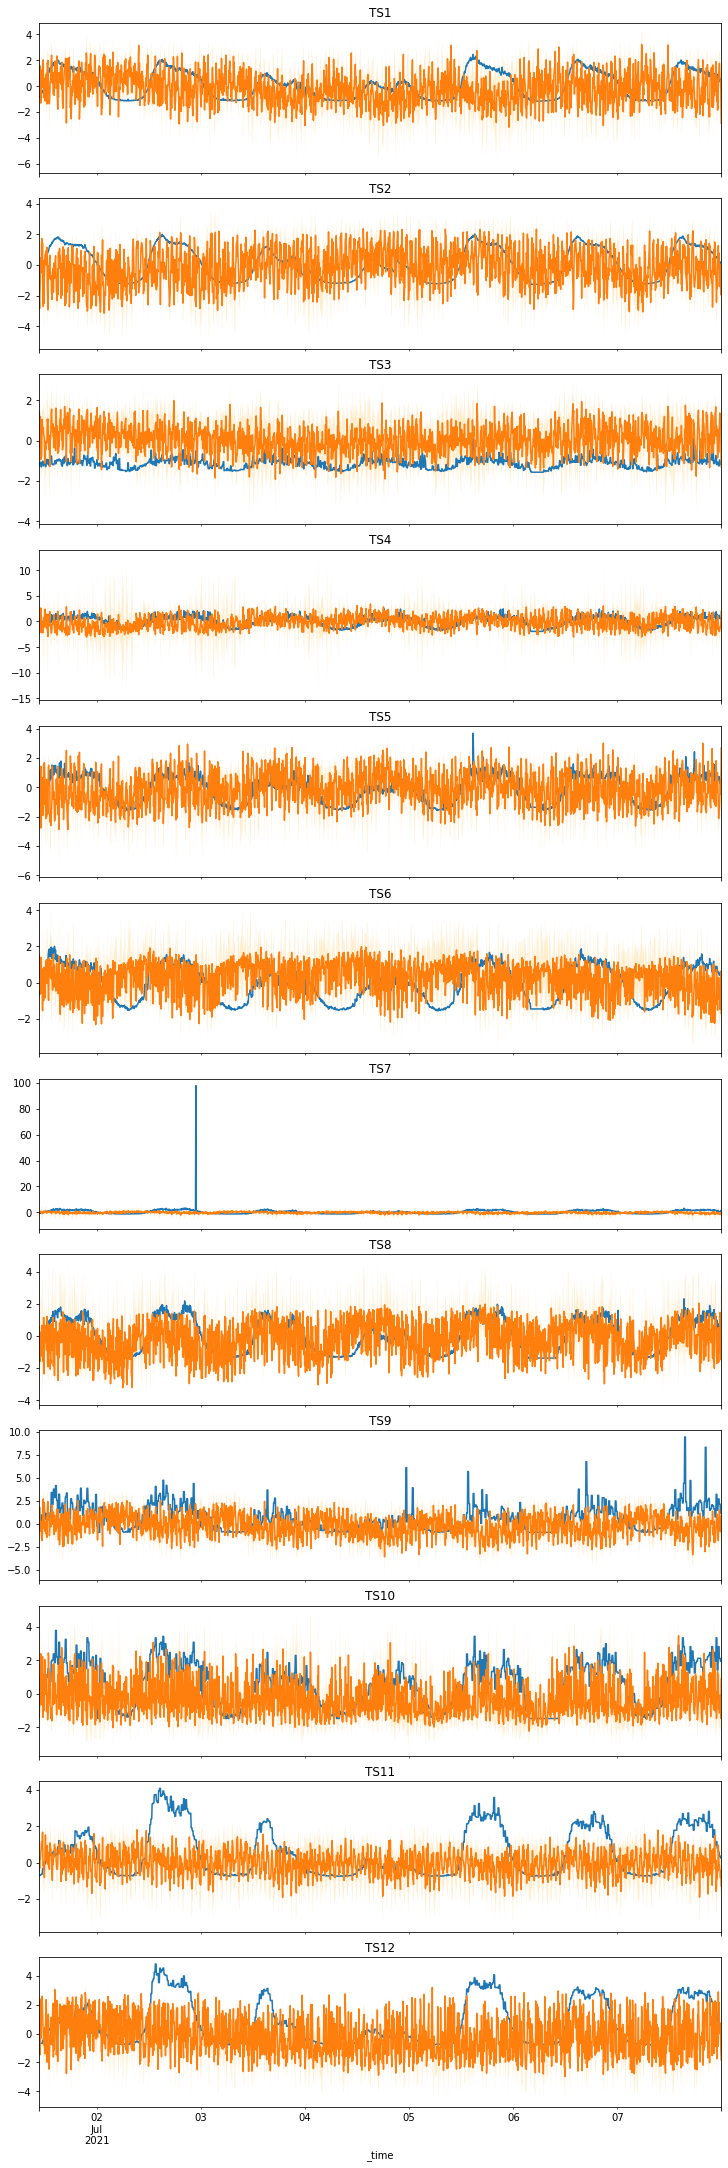

In [ ]:
#define number of rows and columns for subplots
nrow=12
ncol=1
data_aux = data_cd[reconst.index[0]:].copy()

columns_list = data_aux.columns

time_start = '2021-07-01'
time_end = '2021-07-07'
fig, axes = plt.subplots(nrow, ncol, figsize=(10,30), constrained_layout=True, sharex=True)

# plot counter
count=0

for r in range(nrow):
    for c in range(ncol):
        data_aux[columns_list[count]][time_start:time_end].plot(ax=axes[r])
        df_mu_gen[columns_list[count]][time_start:time_end].plot(ax=axes[r])
        axes[r].fill_between(data_aux[columns_list[count]][time_start:time_end].index,
                         th_up_gen[columns_list[count]][time_start:time_end],
                         th_down_gen[columns_list[count]][time_start:time_end],
                         facecolor='orange', alpha=0.2, interpolate=True)
        axes[r].set_title(columns_list[count])
        count+=1